In [0]:
import gym
import numpy as np
import random

env_name = "MountainCar-v0"
env = gym.make(env_name)

obs = env.reset()
#env.render()
n_states   = 40
episodes   = 10000
initial_lr = 1.0
min_lr     = 0.005
gamma      = 0.99
max_stps   = 300
epsilon    = 0.1

env = env.unwrapped
env.seed()
np.random.seed(0)

def discretization(env, obs):
    env_low    = env.observation_space.low
    env_high   = env.observation_space.high
    env_den    = (env_high - env_low) / n_states
    pos_den    = env_den[0]
    vel_den    = env_den[1]
    pos_high   = env_high[0]
    pos_low    = env_low[0]
    vel_high   = env_high[1]
    vel_low    = env_low[1]
    pos_scaled = int((obs[0] - pos_low) / pos_den)
    vel_scaled = int((obs[1] - vel_low) / vel_den)
    
    return pos_scaled, vel_scaled

random.seed(7)
#  27 and 39
first_index = random.randint(15, n_states - 1)
second_index = random.randint(15, n_states - 1)
action_values = []
# 40 x 40 x 3 = 4800 possible options
q_table = np.zeros((n_states, n_states, env.action_space.n))
total_steps = 0
for episode in range(episodes):
    #print("Episode:", episode)
    obs = env.reset()
    total_reward = 0
    alpha = max(min_lr, initial_lr*(gamma**(episode//100)))
    steps = 0
    while True:
        #env.render()
        pos, vel = discretization(env, obs)
        
        if np.random.uniform(low=0, high=1) < epsilon:
            a = np.random.choice(env.action_space.n)

        else:
            a = np.argmax(q_table[pos][vel])
            
        obs, reward, terminate,_ = env.step(a)
        total_reward += abs(obs[0]+0.5)
        
        pos_, vel_ = discretization(env, obs)
        
        q_table[pos][vel][a] = (1-alpha)*q_table[pos][vel][a]+ alpha*(reward+gamma*np.max(q_table[pos_][vel_]))
        
        
        steps += 1
        if terminate:
            break
            
    action_values.append((q_table[first_index][second_index][0], q_table[first_index][second_index][1], q_table[first_index][second_index][2]))
#     action_values.append((q_table[20][20][0], q_table[20][20][1], q_table[20][20][2]))
#     if episode % 100 == 0:
#       print("results for q_table[20][20][0]")
#       print(q_table[20, 20, 0])
#       print(q_table[20][20][0])
#       print(action_values[episode])
print("FINISHED")
            
#while True:
#    env.render()

FINISHED


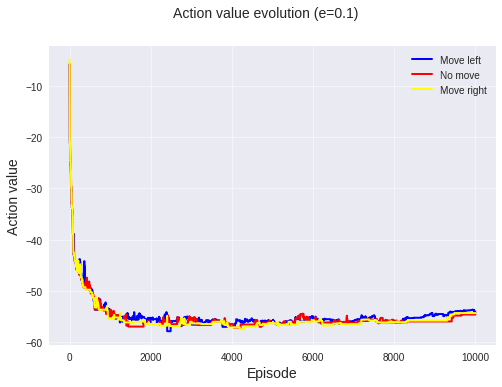

In [0]:
import matplotlib.pyplot as plt

array = np.arange(episodes)
# fig_3 = plt.figure(figsize=(4,4))
plt.suptitle("Action value evolution (e={})".format(epsilon), fontsize=14)
plt.ylabel('Action value', fontsize=14)
plt.xlabel('Episode', fontsize=14)
plt.grid(linestyle='-', linewidth=0.5)
plt.plot(array, list(zip(*action_values))[0], color = "blue", label="Move left", linestyle='-', lw=2)
plt.plot(array, list(zip(*action_values))[1], color = "red", label="No move", linestyle='-', lw=2)
plt.plot(array, list(zip(*action_values))[2], color = "yellow", label="Move right", linestyle='-', lw=2)
plt.legend() 
plt.show()
